# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.3 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:

from maddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
SOLVED_SCORE = 0.5
CONSEC_EPISODES = 100
PRINT_EVERY = 10
ADD_NOISE = True

In [9]:
# MADDPG function

def maddpg(n_episodes=2000, max_t=1000, train_mode=True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_window = deque(maxlen=CONSEC_EPISODES)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False    

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        
        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}\tMax Reward: {:.3f}\tMoving Average Score: {:.3f}'.format(
                i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))

        # determine if environment is solved and keep best performing models
        if moving_average[-1] >= SOLVED_SCORE:
            if not already_solved:
                print('<-- Environment solved in {:d} episodes! \
                \n<-- Moving Average Score: {:.3f} over past {:d} episodes'.format(
                    i_episode-CONSEC_EPISODES, moving_average[-1], CONSEC_EPISODES))
                already_solved = True
                # save weights
                torch.save(agent_0.actor_local.state_dict(), 'models/actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'models/critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'models/actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'models/critic_1.pth')
            elif ep_best_score >= best_score:
                print('<-- Best episode so far!\
                \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average Score: {:.3f}'.format(
                i_episode, ep_best_score, moving_average[-1]))
                
            elif (i_episode-best_episode) >= 200:
                # stop training if model stops converging
                print('<-- Training stopped. Best score acheived in less than 200 episodes')
                break
            else:
                continue
            
        torch.save(agent_0.actor_local.state_dict(), 'models/best_actor_0.pth')
        torch.save(agent_0.critic_local.state_dict(), 'models/best_critic_0.pth')
        torch.save(agent_1.actor_local.state_dict(), 'models/best_actor_1.pth')
        torch.save(agent_1.critic_local.state_dict(), 'models/best_critic_1.pth')
            
    return scores_all, moving_average


def get_actions(states, add_noise):
    '''gets actions for each agent and then combines them into one array'''
    action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
    action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
    return np.concatenate((action_0, action_1), axis=0).flatten()

# initialize agents
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

with active_session():
    scores, avgs = maddpg()

Episodes 0010	Max Reward: 0.100	Moving Average Score: 0.010
Episodes 0020	Max Reward: 0.100	Moving Average Score: 0.010
Episodes 0030	Max Reward: 0.100	Moving Average Score: 0.010
Episodes 0040	Max Reward: 0.100	Moving Average Score: 0.013
Episodes 0050	Max Reward: 0.000	Moving Average Score: 0.010
Episodes 0060	Max Reward: 0.100	Moving Average Score: 0.010
Episodes 0070	Max Reward: 0.200	Moving Average Score: 0.014
Episodes 0080	Max Reward: 0.100	Moving Average Score: 0.018
Episodes 0090	Max Reward: 0.100	Moving Average Score: 0.017
Episodes 0100	Max Reward: 0.100	Moving Average Score: 0.019
Episodes 0110	Max Reward: 0.100	Moving Average Score: 0.023
Episodes 0120	Max Reward: 0.100	Moving Average Score: 0.027
Episodes 0130	Max Reward: 0.200	Moving Average Score: 0.030
Episodes 0140	Max Reward: 0.200	Moving Average Score: 0.032
Episodes 0150	Max Reward: 0.100	Moving Average Score: 0.037
Episodes 0160	Max Reward: 0.200	Moving Average Score: 0.041
Episodes 0170	Max Reward: 0.300	Moving A

Episodes 1340	Max Reward: 1.600	Moving Average Score: 0.460
Episodes 1350	Max Reward: 0.400	Moving Average Score: 0.430
Episodes 1360	Max Reward: 0.600	Moving Average Score: 0.398
Episodes 1370	Max Reward: 1.100	Moving Average Score: 0.414
Episodes 1380	Max Reward: 0.600	Moving Average Score: 0.381
Episodes 1390	Max Reward: 1.200	Moving Average Score: 0.384
Episodes 1400	Max Reward: 1.000	Moving Average Score: 0.382
Episodes 1410	Max Reward: 0.200	Moving Average Score: 0.335
Episodes 1420	Max Reward: 0.400	Moving Average Score: 0.316
Episodes 1430	Max Reward: 0.200	Moving Average Score: 0.291
Episodes 1440	Max Reward: 1.200	Moving Average Score: 0.278
Episodes 1450	Max Reward: 2.700	Moving Average Score: 0.294
Episodes 1460	Max Reward: 1.100	Moving Average Score: 0.284
Episodes 1470	Max Reward: 1.100	Moving Average Score: 0.256
Episodes 1480	Max Reward: 5.200	Moving Average Score: 0.293
Episodes 1490	Max Reward: 4.300	Moving Average Score: 0.350
Episodes 1500	Max Reward: 5.000	Moving A

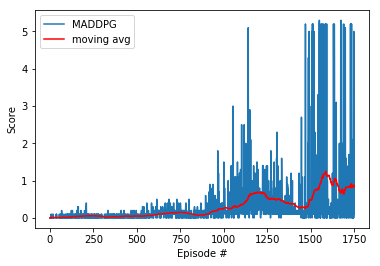

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()


#### Test a saved agent

In [11]:
CONSEC_EPISODES = 10
PRINT_EVERY = 1
ADD_NOISE = False

In [12]:
## reinitialize the agents (if needed)
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

# load the weights from file
agent_0_weights = 'models/best_actor_0.pth'
agent_1_weights = 'models/best_actor_1.pth'
agent_0.actor_local.load_state_dict(torch.load(agent_0_weights))
agent_1.actor_local.load_state_dict(torch.load(agent_1_weights))

In [13]:
def test(n_episodes=10, max_t=1000, train_mode=False):

    scores_window = deque(maxlen=CONSEC_EPISODES)
    scores_all = []
    moving_average = []  

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                 i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            
    return scores_all, moving_average

In [14]:
scores, avgs = test()

Episodes 0001	Max Reward: 5.200	Moving Average: 5.200
Episodes 0002	Max Reward: 0.100	Moving Average: 2.650
Episodes 0003	Max Reward: 5.200	Moving Average: 3.500
Episodes 0004	Max Reward: 5.300	Moving Average: 3.950
Episodes 0005	Max Reward: 0.100	Moving Average: 3.180
Episodes 0006	Max Reward: 0.300	Moving Average: 2.700
Episodes 0007	Max Reward: 5.200	Moving Average: 3.057
Episodes 0008	Max Reward: 0.100	Moving Average: 2.688
Episodes 0009	Max Reward: 5.200	Moving Average: 2.967
Episodes 0010	Max Reward: 5.300	Moving Average: 3.200


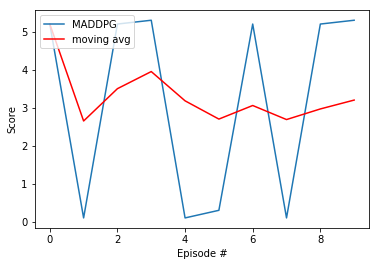

In [15]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()
